In [2]:
import sys
import GPy
import logging
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/home/st/st_st/st_st163811/workspace/vle_using_solvation_free_energy")

from scipy.interpolate import interp1d
from tools.gaussian_process import GPR
from tools.reader import get_dh_dl, get_data

from utils_automated import get_new_lambdas, train_gpr, get_partial_uncertanty, get_rmsd, estimate_variance

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.


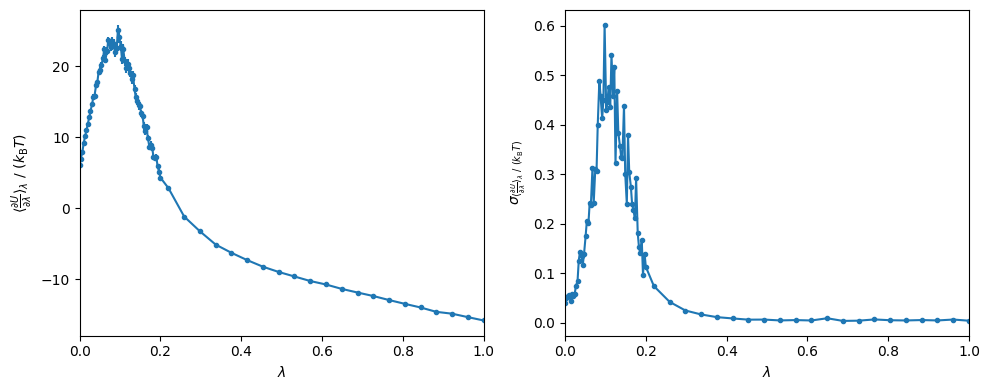

In [3]:
# Gather simulation results

data_output = "../simulation_systems/mixture_hexane_butylamine/373/hexane_coupled/x1.0/vdw/TI/sim_%d/fep%d%d.sampling"

idx_sim_folder = np.arange(0,81,1)
paths     = [data_output%(i,i,i+1) for i in idx_sim_folder]
lambdas   = np.round( np.concatenate( (np.linspace(0,0.2,60), np.linspace(0.22,1.0,21)) ), 3 )
mean, var = get_dh_dl( fe_data = [get_data(paths)], no_intermediates = len(lambdas), delta = 0.0001 , both_ways = False)


# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first figure on the left subplot
ax1.errorbar(lambdas,mean, yerr=np.sqrt(var), marker=".")
ax1.set_xlim(0,1)
ax1.set_xlabel("$\lambda$")
ax1.set_ylabel("$ \\langle \\frac{\partial U}{\partial \lambda} \\rangle_{\lambda} \ / \ (k_\mathrm{B}T)$")

# Plot the second figure on the right subplot
ax2.plot(lambdas, var, marker=".")
ax2.set_xlim(0,1)
ax2.set_xlabel("$\lambda$")
ax2.set_ylabel("$ \sigma_{ \\langle \\frac{\partial U}{\partial \lambda} \\rangle_{\lambda} \ / \ (k_\mathrm{B}T) }$")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()
plt.close()

y_int = interp1d( lambdas, mean )
v_int = interp1d( lambdas, var )

In [6]:
l_learn   = np.array([[]])
var_learn = np.array([[]])


lambda_init = [0.0, 0.4, 1.0]
var_init     = v_int(lambda_init)

for i in range(10):

    print(f"\nItteration n°{i}\n")

    # get partial uncertanties
    dG_i_inter  = get_partial_uncertanty( lambda_init, var_init )

    print(dG_i_inter)

    # Get rmsd to optimal variance
    rmsd        = get_rmsd(dG_i_inter,verbose=True)

    if l_learn.size == 0:
        l_learn   = np.array(lambda_init).reshape(-1, 1)
        var_learn = np.array(var_init).reshape(-1, 1)
    else:
        l_learn   = np.concatenate( [ l_learn, np.array(lambda_init).reshape(-1, 1) ] )
        var_learn = np.concatenate( [ var_learn, np.array(var_init).reshape(-1, 1) ] )

    # Sort training data and make it unique
    _ ,idx       = np.unique( l_learn, return_index=True )
    l_learn      = l_learn[idx]
    var_learn    = var_learn[idx]

    gpr_modeling = train_gpr(l_learn, var_learn, kernel = GPy.kern.Matern32 )

    lambda_init = get_new_lambdas(lambdas = lambda_init, variances = var_init, gpr_model = gpr_modeling, method = "GPR",
                                optimization_method ='bayesian_optimization', precision=3, verbose=False)
    var_init    = v_int(lambda_init)

    print("\n",lambda_init,"\n")
    print("\n",var_init,"\n")

    
    

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


[0.06436362035293386, 0.043085302025257274]

Optimal uncertanty in each lambda step: 0.054

RMSD to optimal value: 28.01%

Optimization restart 1/3, f = 2.5556392604557114
Optimization restart 2/3, f = 2.555639260446365
Optimization restart 3/3, f = 2.5556392604552314


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



 [0.0, 0.141, 0.338, 1.0] 


 [0.09009868 0.67788043 0.0173926  0.00715782] 

[0.06178226396543275, 0.08213228833626939, 0.051862984564901994]

Optimal uncertanty in each lambda step: 0.065

RMSD to optimal value: 23.65%

Optimization restart 1/3, f = 2.7388215421669564
Optimization restart 2/3, f = 2.7388215422125426
Optimization restart 3/3, f = 2.738821542161501


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



 [0.0, 0.1, 0.168, 0.336, 1.0] 


 [0.09009868 0.60134631 0.28502235 0.01943554 0.00715782] 

[0.041576585411232034, 0.03201003227345805, 0.04634927015094451, 0.05414080004093575]

Optimal uncertanty in each lambda step: 0.044

RMSD to optimal value: 21.27%

Optimization restart 1/3, f = -2.1031841472657593
Optimization restart 2/3, f = -2.1031841472687693
Optimization restart 3/3, f = -2.1031841472694013


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



 [0.0, 0.079, 0.127, 0.167, 0.263, 1.0] 


 [0.09009868 0.59777641 0.81272849 0.29151155 0.06023922 0.00715782] 

[0.032760602867793705, 0.028503522950782147, 0.021016565218947524, 0.02846811857510308, 0.09566606710355338]

Optimal uncertanty in each lambda step: 0.041

RMSD to optimal value: 74.35%

Optimization restart 1/3, f = -11.73326309481715
Optimization restart 2/3, f = -11.733263094817243
Optimization restart 3/3, f = -11.733263094818657


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



 [0.0, 0.083, 0.158, 0.216, 0.334, 0.607, 1.0] 


 [0.09009868 0.63280442 0.41705521 0.1274198  0.02224661 0.00831947
 0.00715782] 

[0.03528483901346264, 0.038423496913034726, 0.02139867955707202, 0.02282517870817068, 0.023864509990127885, 0.024446123526803747]

Optimal uncertanty in each lambda step: 0.028

RMSD to optimal value: 26.09%

Optimization restart 1/3, f = -24.649323133311448
Optimization restart 2/3, f = -24.649323133312407
Optimization restart 3/3, f = -24.649323133312837


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



 [0.0, 0.085, 0.122, 0.161, 0.221, 0.336, 0.61, 1.0] 


 [0.09009868 0.65031843 0.79255854 0.35282703 0.11064687 0.01943554
 0.00873845 0.00715782] 

[0.03657018459657698, 0.02222216558687391, 0.020869424060917418, 0.020423675038584378, 0.02073848940925024, 0.022995598164489164, 0.024585679828021605]

Optimal uncertanty in each lambda step: 0.024

RMSD to optimal value: 23.74%

Optimization restart 1/3, f = -44.43597135110218
Optimization restart 2/3, f = -44.435971351103916
Optimization restart 3/3, f = -44.43597135098938


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



 [0.0, 0.053, 0.087, 0.123, 0.159, 0.215, 0.334, 0.62, 1.0] 


 [0.09009868 0.22320976 0.66783244 0.80563252 0.39564582 0.13077439
 0.02224661 0.00725746 0.00715782] 

[0.014833099694171466, 0.01604715535966497, 0.02184954572928964, 0.019728511916150528, 0.020315349889147703, 0.023275149735702952, 0.02456275016920086, 0.022812091812458093]

Optimal uncertanty in each lambda step: 0.020

RMSD to optimal value: 16.95%

Optimization restart 1/3, f = -70.91962932559136
Optimization restart 2/3, f = -70.91962932559267
Optimization restart 3/3, f = -70.91962932545738


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



 [0.0, 0.057, 0.087, 0.122, 0.157, 0.214, 0.334, 0.424, 0.612, 1.0] 


 [0.09009868 0.26452029 0.66783244 0.79255854 0.43846461 0.13412898
 0.02224661 0.01188235 0.00901777 0.00715782] 

[0.016971719276921902, 0.014483762101178538, 0.021148161559246245, 0.01941650943415483, 0.021565925405808716, 0.023726611931565354, 0.008313311967969078, 0.013589462611460948, 0.02467355882023754]

Optimal uncertanty in each lambda step: 0.018

RMSD to optimal value: 29.33%

Optimization restart 1/3, f = -93.78133358276794
Optimization restart 2/3, f = -93.78133358276337


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 3/3, f = -93.78133358270038


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as par


 [0.0, 0.058, 0.088, 0.123, 0.161, 0.215, 0.266, 0.335, 0.426, 0.612, 1.0] 


 [0.09009868 0.27484792 0.66937636 0.80563252 0.35282703 0.13077439
 0.0577423  0.02084107 0.01182294 0.00901777 0.00715782] 

[0.017519134973937766, 0.014575680545123076, 0.021253740138868906, 0.0204500341653438, 0.018776193195948247, 0.01107171960998067, 0.009671290387355985, 0.008223300862197873, 0.013425770111751325, 0.02467355882023754]

Optimal uncertanty in each lambda step: 0.016

RMSD to optimal value: 34.06%

Optimization restart 1/3, f = -120.80022275510731
Optimization restart 2/3, f = -120.80022275505193
Optimization restart 3/3, f = -120.80022275300605


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as par


 [0.0, 0.058, 0.088, 0.122, 0.159, 0.213, 0.256, 0.334, 0.437, 0.612, 0.809, 1.0] 


 [0.09009868 0.27484792 0.66937636 0.79255854 0.39564582 0.13748356
 0.06770658 0.02224661 0.01215899 0.00901777 0.00762893 0.00715782] 

[0.017519134973937766, 0.014575680545123076, 0.020554784961790997, 0.020165885563118956, 0.01971424149941707, 0.00973905252187864, 0.011696957095499765, 0.009552605330235671, 0.012733208521866827, 0.012708675621665427, 0.011612874836044597]

Optimal uncertanty in each lambda step: 0.015

RMSD to optimal value: 28.63%

Optimization restart 1/3, f = -134.82692183196986
Optimization restart 2/3, f = -134.82692183197707
Optimization restart 3/3, f = -134.82692183197702


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


TypeError: '<=' not supported between instances of 'float' and 'NoneType'

In [ ]:
# --> redefine the objective function.

In [3]:
l_learn   = np.array([[]])
var_learn = np.array([[]])


lambda_init = [0.0, 0.4, 1.0]
var_init     = v_int(lambda_init)

for i in range(10):

    print(f"\nItteration n°{i}\n")

    # get partial uncertanties
    dG_i_inter  = get_partial_uncertanty( lambda_init, var_init )

    print(dG_i_inter)

    # Get rmsd to optimal variance
    rmsd        = get_rmsd(dG_i_inter,verbose=True)

    if l_learn.size == 0:
        l_learn   = np.array(lambda_init).reshape(-1, 1)
        var_learn = np.array(var_init).reshape(-1, 1)
    else:
        l_learn   = np.concatenate( [ l_learn, np.array(lambda_init).reshape(-1, 1) ] )
        var_learn = np.concatenate( [ var_learn, np.array(var_init).reshape(-1, 1) ] )

    # Sort training data and make it unique
    _ ,idx       = np.unique( l_learn, return_index=True )
    l_learn      = l_learn[idx]
    var_learn    = var_learn[idx]

    gpr_modeling = train_gpr(l_learn, var_learn, kernel = GPy.kern.Matern32 )

    lambda_init = get_new_lambdas(lambdas = lambda_init, variances = var_init, gpr_model = gpr_modeling, method = "GPR",
                                  optimization_method ='nelder_mead', precision=3, verbose=True)
    var_init    = v_int(lambda_init)

    print("\n",lambda_init,"\n")
    print("\n",var_init,"\n")

    
print("\n",lambda_init,"\n")
print("\n",var_init,"\n")

dG_i_inter  = get_partial_uncertanty( lambda_init, var_init )

print(dG_i_inter)

# Get rmsd to optimal variance
rmsd        = get_rmsd(dG_i_inter,verbose=True)

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Itteration n°0

[0.04264472316567883, 0.04591261157367181]

Optimal uncertanty in each lambda step: 0.044

Relative RMSD to optimal value: 3.69%

Optimization restart 1/3, f = 2.4545343907280235
Optimization restart 2/3, f = 2.4545343907344446
Optimization restart 3/3, f = 2.454534390740656
These are the current std (bevore iteration): [0.04264472316567883, 0.04591261157367181]
This is the optimal std 0.029519111579783545 



INFO:utils_automated:
The minumum RMSD was at 0.448: 42 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.448  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00746  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.190: 45 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.19  0.448  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.02679  0.00746  0.00413
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



 [0.0, 0.19, 0.448, 1.0] 


 [0.03972961 0.16675238 0.00664313 0.00413165] 


Itteration n°1

[0.04972640022938025, 0.06622911375432079, 0.083175558311669]

Optimal uncertanty in each lambda step: 0.066

Relative RMSD to optimal value: 20.57%

Optimization restart 1/3, f = 2.2427791742324206
Optimization restart 2/3, f = 2.242779174230143
Optimization restart 3/3, f = 2.242779174231069
These are the current std (bevore iteration): [0.04972640022938025, 0.06622911375432079, 0.083175558311669]
This is the optimal std 0.049782768073842514 



INFO:utils_automated:
The minumum RMSD was at 0.393: 9 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.393  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.01195  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.527: 48 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.393  0.527  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.01195  0.00565  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.183: 40 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.183  0.393  0.527  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.16657  0.01195  0.00565  0.00413
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



 [0.0, 0.183, 0.393, 0.527, 1.0] 


 [0.03972961 0.15366874 0.01021722 0.00492858 0.00413165] 


Itteration n°2

[0.04836838167697652, 0.04687624515668185, 0.009249404744042226, 0.04524824750170559]

Optimal uncertanty in each lambda step: 0.037

Relative RMSD to optimal value: 43.57%

Optimization restart 1/3, f = -3.439533373137146
Optimization restart 2/3, f = -3.439533373135146
Optimization restart 3/3, f = -3.439533373137831
These are the current std (bevore iteration): [0.04836838167697652, 0.04687624515668185, 0.009249404744042226, 0.04524824750170559]
This is the optimal std 0.029948455815881236 



INFO:utils_automated:
The minumum RMSD was at 0.449: 38 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.449  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00659  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.882: 58 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.449  0.882  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00659  0.00196  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.831: 69 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.449  0.831  0.882  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00659  0.00128  0.00196  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.990: 71 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.449  0.831  0.882  0.99  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00659  0.00128  0.00196  0.00409  0.00413
INFO:GP:initializing Y
INFO:GP:initia


 [0.0, 0.449, 0.831, 0.882, 0.99, 1.0] 


 [0.03972961 0.00657973 0.00480659 0.00544722 0.00473951 0.00413165] 


Itteration n°3

[0.05032714509426219, 0.05008332208701222, 0.0027562642171363814, 0.013840041377125564, 0.00047270210037547543]

Optimal uncertanty in each lambda step: 0.023

Relative RMSD to optimal value: 94.79%

Optimization restart 1/3, f = -12.134395005426306
Optimization restart 2/3, f = -12.134395005433447
Optimization restart 3/3, f = -12.13439500543354
These are the current std (bevore iteration): [0.05032714509426219, 0.05008332208701222, 0.0027562642171363814, 0.013840041377125564, 0.00047270210037547543]
This is the optimal std 0.01957991247931864 



INFO:utils_automated:
The minumum RMSD was at 0.466: 105 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.466  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00576  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.777: 86 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.466  0.777  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00576  0.00387  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.955: 87 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.466  0.777  0.955  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00576  0.00387  0.0058  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.690: 91 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.466  0.69  0.777  0.955  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00576  0.00307  0.00387  0.0058  0.00413
INFO:utils_automated:
The minumum RMSD


 [0.0, 0.466, 0.69, 0.777, 0.934, 0.955, 1.0] 


 [0.03972961 0.00631572 0.00375043 0.00626361 0.00524118 0.00622207
 0.00413165] 


Itteration n°4

[0.05214914931527371, 0.015015738539671059, 0.004767582237286886, 0.019179198491944216, 0.0011548275737671922, 0.003097156632541224]

Optimal uncertanty in each lambda step: 0.016

Relative RMSD to optimal value: 109.90%

Optimization restart 1/3, f = -21.64360908468472
Optimization restart 2/3, f = -21.643609084668988
Optimization restart 3/3, f = -21.643609084642776
These are the current std (bevore iteration): [0.05214914931527371, 0.015015738539671059, 0.004767582237286886, 0.019179198491944216, 0.0011548275737671922, 0.003097156632541224]
This is the optimal std 0.013623378970069183 



INFO:utils_automated:
The minumum RMSD was at 0.455: 196 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00635  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.735: 143 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  0.735  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00635  0.0055  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.907: 132 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  0.735  0.907  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00635  0.0055  0.00508  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.990: 129 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  0.735  0.907  0.99  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00635  0.0055  0.00508  0.00474  0.00413
INFO:utils_automated:
The minumum RM


 [0.0, 0.455, 0.646, 0.735, 0.853, 0.907, 0.99, 1.0] 


 [0.03972961 0.00626716 0.00877    0.00474069 0.00484865 0.00498344
 0.00473951 0.00413165] 


Itteration n°5

[0.05417056151650691, 0.01574930577835182, 0.005478264969388813, 0.00776421918573542, 0.0029567278464505435, 0.008923998049711326, 0.0004734602016740583]

Optimal uncertanty in each lambda step: 0.014

Relative RMSD to optimal value: 125.66%

Optimization restart 1/3, f = -36.42014359419625
Optimization restart 2/3, f = -36.42014359409649
Optimization restart 3/3, f = -36.420143594234254
These are the current std (bevore iteration): [0.05417056151650691, 0.01574930577835182, 0.005478264969388813, 0.00776421918573542, 0.0029567278464505435, 0.008923998049711326, 0.0004734602016740583]
This is the optimal std 0.01193956719347736 



INFO:utils_automated:
The minumum RMSD was at 0.456: 236 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.456  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00624  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.722: 171 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.456  0.722  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00624  0.00399  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.893: 154 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.456  0.722  0.893  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00624  0.00399  0.0053  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.977: 145 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.456  0.722  0.893  0.977  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00624  0.00399  0.0053  0.00559  0.00413
INFO:utils_automated:
The minumum 


 [0.0, 0.456, 0.722, 0.839, 0.893, 0.967, 0.977, 0.99, 1.0] 


 [0.03972961 0.00627157 0.00416441 0.00471815 0.00526602 0.0061376
 0.00552974 0.00473951 0.00413165] 


Itteration n°6

[0.049554034003462935, 0.01938815352482123, 0.007663461753064954, 0.003143753931559211, 0.010082181875828615, 0.000574296614825098, 0.0007638970328640343, 0.0005143825870211842]

Optimal uncertanty in each lambda step: 0.011

Relative RMSD to optimal value: 136.31%

Optimization restart 1/3, f = -63.5738329262216
Optimization restart 2/3, f = -63.57383292623954
Optimization restart 3/3, f = -63.573832926159
These are the current std (bevore iteration): [0.049554034003462935, 0.01938815352482123, 0.007663461753064954, 0.003143753931559211, 0.010082181875828615, 0.000574296614825098, 0.0007638970328640343, 0.0005143825870211842]
This is the optimal std 0.010187129035938583 



INFO:utils_automated:
The minumum RMSD was at 0.455: 293 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.718: 212 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  0.718  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.00399  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.892: 188 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  0.718  0.892  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.00399  0.00529  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.972: 175 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  0.718  0.892  0.972  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.00399  0.00529  0.00586  0.00413
INFO:utils_automated:
The minumu


 [0.0, 0.455, 0.718, 0.836, 0.892, 0.961, 0.972, 0.989, 0.99, 1.0] 


 [0.03972961 0.00626716 0.00411266 0.00475132 0.0052862  0.00650232
 0.00583367 0.0048003  0.00473951 0.00413165] 


Itteration n°7

[0.04950080686823726, 0.019067482919569303, 0.007829580112891367, 0.0034288332687083846, 0.009941297276975508, 0.0007304749520781551, 0.0033917754711984536, 4.891806466745128e-05, 0.0014980906861321284]

Optimal uncertanty in each lambda step: 0.011

Relative RMSD to optimal value: 140.16%

Optimization restart 1/3, f = -98.84768787550873
Optimization restart 2/3, f = -98.84768806634452
Optimization restart 3/3, f = -98.84768806600997
These are the current std (bevore iteration): [0.04950080686823726, 0.019067482919569303, 0.007829580112891367, 0.0034288332687083846, 0.009941297276975508, 0.0007304749520781551, 0.0033917754711984536, 4.891806466745128e-05, 0.0014980906861321284]
This is the optimal std 0.009543725962045802 



INFO:utils_automated:
The minumum RMSD was at 0.455: 320 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.725: 231 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  0.725  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.00425  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.898: 205 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  0.725  0.898  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.00425  0.00516  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.973: 191 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  0.725  0.898  0.973  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.00425  0.00516  0.00578  0.00413
INFO:utils_automated:
The minumu


 [0.0, 0.455, 0.725, 0.841, 0.898, 0.939, 0.95, 0.961, 0.973, 0.99, 1.0] 


 [0.03972961 0.00626716 0.00420322 0.00469605 0.0051651  0.00547472
 0.00598852 0.00650232 0.00577288 0.00473951 0.00413165] 


Itteration n°8

[0.049591991967051885, 0.020371800799485112, 0.007884700628422708, 0.003756375982370503, 0.003662110044718506, 0.0006533494403049647, 0.0006888505871261481, 0.00075500809844508, 0.0010780886690686564, 0.0005008481264181186]

Optimal uncertanty in each lambda step: 0.009

Relative RMSD to optimal value: 165.85%

Optimization restart 1/3, f = -134.45230017122174
Optimization restart 2/3, f = -134.452300171005
Optimization restart 3/3, f = -134.4523001705582
These are the current std (bevore iteration): [0.049591991967051885, 0.020371800799485112, 0.007884700628422708, 0.003756375982370503, 0.003662110044718506, 0.0006533494403049647, 0.0006888505871261481, 0.00075500809844508, 0.0010780886690686564, 0.0005008481264181186]
This is the optimal std 0.008085738576673789 



INFO:utils_automated:
The minumum RMSD was at 0.455: 395 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.725: 285 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  0.725  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.0042  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.898: 252 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  0.725  0.898  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.0042  0.00517  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.972: 233 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  0.725  0.898  0.972  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.0042  0.00517  0.00583  0.00413
INFO:utils_automated:
The minumum R


 [0.0, 0.455, 0.725, 0.841, 0.898, 0.921, 0.931, 0.944, 0.957, 0.972, 0.99, 1.0] 


 [0.03972961 0.00626716 0.00420322 0.00469605 0.0051651  0.00470085
 0.00510105 0.00570827 0.00631549 0.00583367 0.00473951 0.00413165] 


Itteration n°9

[0.05010082585052949, 0.021386294194715383, 0.008565933988491991, 0.004440356463570572, 0.0015213533039523945, 0.0005328024887785884, 0.0007860584608501383, 0.0008073376298727734, 0.0009548660252914052, 0.001124686181634346, 0.0004974261386893082]

Optimal uncertanty in each lambda step: 0.008

Relative RMSD to optimal value: 176.05%

Optimization restart 1/3, f = -157.6837742250534
Optimization restart 2/3, f = -157.6837742248139
Optimization restart 3/3, f = -157.68377422579994
These are the current std (bevore iteration): [0.05010082585052949, 0.021386294194715383, 0.008565933988491991, 0.004440356463570572, 0.0015213533039523945, 0.0005328024887785884, 0.0007860584608501383, 0.0008073376298727734, 0.0009548660252914052, 0.001124686181634346, 0.00

INFO:utils_automated:
The minumum RMSD was at 0.455: 429 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.725: 310 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  0.725  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.0042  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.898: 273 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  0.725  0.898  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.0042  0.00517  0.00413
INFO:utils_automated:
The minumum RMSD was at 0.971: 253 % 
INFO:utils_automated:
Current intermediate points: 
0.0  0.455  0.725  0.898  0.971  1.0
INFO:utils_automated:GPR estimated variance of current points: 
0.03973  0.00627  0.0042  0.00517  0.00589  0.00413
INFO:utils_automated:
The minumum R


 [0.0, 0.455, 0.725, 0.841, 0.898, 0.929, 0.942, 0.956, 0.971, 0.972, 0.973, 0.99, 1.0] 


 [0.03972961 0.00626716 0.00420322 0.00469605 0.0051651  0.00500763
 0.00561485 0.00626878 0.00589446 0.00583367 0.00577288 0.00473951
 0.00413165] 


 [0.0, 0.455, 0.725, 0.841, 0.898, 0.929, 0.942, 0.956, 0.971, 0.972, 0.973, 0.99, 1.0] 


 [0.03972961 0.00626716 0.00420322 0.00469605 0.0051651  0.00500763
 0.00561485 0.00626878 0.00589446 0.00583367 0.00577288 0.00473951
 0.00413165] 

[0.04970482723886552, 0.02060055092429488, 0.008044325689357229, 0.003924862714740322, 0.0021886710946459006, 0.0007655498253349818, 0.001194311823149498, 0.003838274732327455, 5.850507380642178e-05, 5.83412102080039e-05, 0.004703166724651365, 0.000652385684022821]

Optimal uncertanty in each lambda step: 0.008

Relative RMSD to optimal value: 171.85%



In [4]:
lambda_init = [0.0, 0.4, 1.0]
var_init     = v_int(lambda_init)

for i in range(10):

    print(f"\nItteration n°{i}\n")

    # get partial uncertanties
    dG_i_inter  = get_partial_uncertanty( lambda_init, var_init )

    print(dG_i_inter)

    # Get rmsd to optimal variance
    rmsd        = get_rmsd(dG_i_inter,verbose=True)

    lambda_init = get_new_lambdas(lambdas = lambda_init, variances = var_init, method = "linear_adapt",
                                  precision=3, verbose=True)
    var_init    = v_int(lambda_init)

    print("\n",lambda_init,"\n")
    print("\n",var_init,"\n")

    
print("\n",lambda_init,"\n")
print("\n",var_init,"\n")

dG_i_inter  = get_partial_uncertanty( lambda_init, var_init )

print(dG_i_inter)

# Get rmsd to optimal variance
rmsd        = get_rmsd(dG_i_inter,verbose=True) 


Itteration n°0

[0.04448608667166703, 0.03534062845386732]

Optimal uncertanty in each lambda step: 0.040

RMSD to optimal value: 16.20%


 [0.0, 0.239, 0.549, 1.0] 


 [0.03972961 0.05857818 0.00501051 0.00413165] 


Itteration n°1

[0.03746811718718153, 0.03908603694171744, 0.02156110032896687]

Optimal uncertanty in each lambda step: 0.033

RMSD to optimal value: 29.61%


 [0.0, 0.158, 0.334, 0.529, 1.0] 


 [0.03972961 0.3291238  0.01739416 0.00483997 0.00413165] 


Itteration n°2

[0.04797930959709208, 0.051801882782353335, 0.01453833460926095, 0.022306237458681797]

Optimal uncertanty in each lambda step: 0.034

RMSD to optimal value: 54.19%


 [0.0, 0.09, 0.181, 0.274, 0.459, 1.0] 


 [0.03972961 0.43575779 0.17182737 0.03550816 0.00628482 0.00413165] 


Itteration n°3

[0.03103001741040998, 0.035466225861864896, 0.021173361921922255, 0.018910080779933676, 0.027607521205893458]

Optimal uncertanty in each lambda step: 0.027

RMSD to optimal value: 25.51%


 [0.0, 0.065, 0.126, 

In [11]:
import pygad

In [7]:
gpr_modeling = train_gpr( lambdas, var, kernel = GPy.kern.Matern32 )

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/3, f = -135.04376420795677
Optimization restart 2/3, f = -135.04376420795637
Optimization restart 3/3, f = -135.04376420795694


In [29]:
gpr_modeling.predict(np.linspace(0,1,20).reshape(-1,1))[0].flatten()

array([0.03972961, 0.19493132, 0.45253987, 0.34276223, 0.04855785,
       0.03286658, 0.00368189, 0.00604837, 0.00553803, 0.00102613,
       0.00313097, 0.00271711, 0.00130925, 0.0030261 , 0.00169973,
       0.00107223, 0.00437434, 0.00166252, 0.00152368, 0.00413164])

In [39]:
import numpy as np
import GPy
from GPyOpt.methods import BayesianOptimization


std_dG_opt = 0.011

# Define your objective function
def objective_function(x):
    
    var_init = [ abs( gpr_modeling.predict([[xx]])[0].item() ) for xx in x.flatten() ]
    
    std_dG_i = get_partial_uncertanty( x.flatten(), var_init )

    # Relative root mean square deviation of the current iteration lambdas to the optimal value 
    # (which is computed as the mean of the input data and the number of newly intermediates)
    rmsd     = np.sqrt( np.mean( (np.array(std_dG_i) - std_dG_opt)**2 ) ) / std_dG_opt

    
    return rmsd

# Define the bounds of the input space
domain = [{'name': f'var_{i}', 'type': 'continuous', 'domain': (0, 1)} for i in range(10)]

# Create the Bayesian Optimization object
bayesian_optimizer = BayesianOptimization(f=objective_function, domain=domain, model_type='GP')

# Run the optimization loop
max_iter = 20
bayesian_optimizer.run_optimization(max_iter)

# Get the optimized point and value
best_point = bayesian_optimizer.x_opt
best_value = bayesian_optimizer.fx_opt

print("Best point:", best_point)
print("Best value:", best_value)


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Best point: [0.48671907 0.86451821 0.         0.         0.54325576 0.74468081
 0.55130734 0.         0.73066275 0.        ]
Best value: nan


In [22]:

std_dG_opt = 0.011

def fitness_function(ga_instance, solution, solution_idx):
    var_init = [ abs( gpr_modeling.predict([[xx]])[0].item() ) for xx in solution ]
    std_dG_i = get_partial_uncertanty( solution, var_init )

    # Relative root mean square deviation of the current iteration lambdas to the optimal value 
    # (which is computed as the mean of the input data and the number of newly intermediates)
    rmsd     = np.sqrt( np.mean( (np.array(std_dG_i) - std_dG_opt)**2 ) ) / std_dG_opt

    return rmsd



ga_instance = pygad.GA(num_generations=3,
                       num_parents_mating=5,
                       init_range_low=0,
                       init_range_high=1,
                       gene_space=range(0,1),
                       fitness_func=fitness_function,
                       sol_per_pop=10,
                       num_genes=10)

ga_instance.run()

Singular matrix
Traceback (most recent call last):
  File "/home/st/st_st/st_st163811/miniconda3/lib/python3.10/site-packages/pygad/pygad.py", line 1688, in cal_pop_fitness
    fitness = self.fitness_func(self, sol, sol_idx)
  File "/tmp/ipykernel_30569/189434157.py", line 5, in fitness_function
    std_dG_i = get_partial_uncertanty( solution, var_init )
  File "/beegfs/work/st_163811/vle_using_solvation_free_energy/development/utils_automated.py", line 70, in get_partial_uncertanty
    spl      = naturalcubicspline( np.array( lambda_list ) )
  File "/home/st/st_st/st_st163811/workspace/vle_using_solvation_free_energy/tools/numeric_utils.py", line 36, in __init__
    CW = np.dot(np.linalg.inv(H),M)  # this is the matrix translating c to weights in f.
  File "/home/st/st_st/st_st163811/.local/lib/python3.10/site-packages/numpy-1.25.0rc1-py3.10-linux-x86_64.egg/numpy/linalg/linalg.py", line 561, in inv
    ainv = _umath_linalg.inv(a, signature=signature, extobj=extobj)
  File "/home/st/s

AttributeError: 'tuple' object has no attribute 'tb_frame'

In [17]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

Parameters of the best solution : [ 0.25023825  0.03127737 -0.15088711  0.87781278 -0.59961085  0.58282766
  0.79738071 -0.23973021  0.6762774   0.81641089]
Fitness value of the best solution = 1645.0948247731012
Index of the best solution : 6
